In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


# Labeling Patients

In [3]:
# Part B
A = np.load('gene_data_train.npy')
b = np.load('diabetes_train.npy')

x = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, b))
print(x)

[[-0.15646169]
 [ 0.09239418]
 [ 0.48053974]
 [-0.5847018 ]
 [-0.35350734]]


In [4]:
# Part C
A_test = np.load('gene_data_test.npy')
b_test = np.load('diabetes_test.npy')

print(np.sign(np.dot(A_test, x)))

[[ 1.]
 [-1.]
 [-1.]
 [ 1.]]


# Image Analysis

[[ 0.58    0.3    -0.7   ]
 [ 1.0781  0.5     0.91  ]
 [ 1.7901  0.9    -0.99  ]
 [ 2.0201  1.      1.01  ]
 [ 2.3049  1.2    -0.93  ]
 [ 2.89    1.5     0.8   ]
 [ 4.      2.      0.    ]]

[[ 0.09   -0.21    0.49    0.3    -0.7   ]
 [ 0.25    0.455   0.8281  0.5     0.91  ]
 [ 0.81   -0.891   0.9801  0.9    -0.99  ]
 [ 1.      1.01    1.0201  1.      1.01  ]
 [ 1.44   -1.116   0.8649  1.2    -0.93  ]
 [ 2.25    1.2     0.64    1.5     0.8   ]
 [ 4.      0.      0.      2.      0.    ]]

[[ 2.39722071]
 [-3.98007129]
 [-0.11237247]]


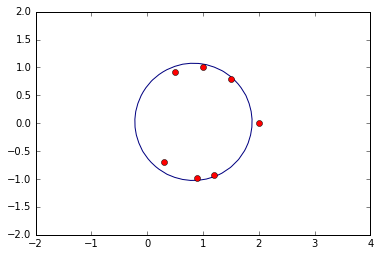

[[ 2.95103059]
 [ 0.4670502 ]
 [ 3.66108715]
 [-5.41586506]
 [-0.55339042]]


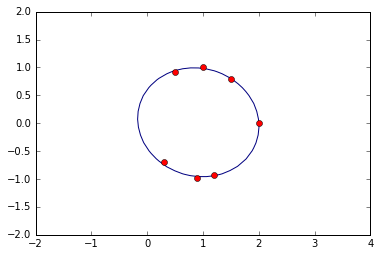

In [10]:
#Part A
x_coords = np.array([.3, .5, .9, 1, 1.2, 1.5, 2])
y_coords = np.array([-.7, .91, -.99, 1.01, -.93, .8, 0])

circle = np.matrix([[i**2 + j**2, i, j] for i,j in zip(x_coords, y_coords)])
print(circle)

print()

#Part B
ellipse = np.matrix([[i**2, i*j, j**2, i, j] for i,j in zip(x_coords, y_coords)])
print(ellipse)

print()

#Part C
a = circle
b = np.ones((7, 1))
result = np.linalg.inv(a.transpose() * a) * a.transpose() * b
print(result)

plt.plot(x_coords, y_coords, 'ro')
plt.axis([-2, 4, -2, 2])

x = np.linspace(-7, 7, 100)
y = np.linspace(-7, 7, 100)
X, Y = np.meshgrid(x,y)
F = 2.3972*(X**2+Y**2) - 3.9801*X - 0.1124*Y -1
plt.contour(X,Y,F,[0])

plt.show()

#Part D
a = ellipse
b = np.ones((7, 1))
result = np.linalg.inv(a.transpose() * a) * a.transpose() * b
print(result)

plt.plot(x_coords, y_coords, 'ro')
plt.axis([-2, 4, -2, 2])

x = np.linspace(-7, 7, 100)
y = np.linspace(-7, 7, 100)
X, Y = np.meshgrid(x,y)
F = 2.9510*X**2 + 0.4671*X*Y + 3.6611*Y**2 - 5.4159*X - 0.5534*Y - 1
plt.contour(X,Y,F,[0])

plt.show()

# GPS Locationing

In [11]:
## RUN THIS FUNCTION BEFORE YOU START THIS PROBLEM
## This function will generate the gold code associated with the satellite ID using linear shift registers
## The satellite_ID can be any integer between 1 and 24
def Gold_code_satellite(satellite_ID):
    codelength = 1023
    registerlength = 10
    
    # Defining the MLS for G1 generator
    register1 = -1*np.ones(registerlength)
    MLS1 = np.zeros(codelength)
    for i in range(codelength):
        MLS1[i] = register1[9]
        modulo = register1[2]*register1[9]
        register1 = np.roll(register1,1)
        register1[0] = modulo
    
    # Defining the MLS for G2 generator
    register2 = -1*np.ones(registerlength)
    MLS2 = np.zeros(codelength)
    for j in range(codelength):
        MLS2[j] = register2[9]
        modulo = register2[1]*register2[2]*register2[5]*register2[7]*register2[8]*register2[9]
        register2 = np.roll(register2,1)
        register2[0] = modulo
    
    delay = np.array([5,6,7,8,17,18,139,140,141,251,252,254,255,256,257,258,469,470,471,472,473,474,509,512,513,514,515,516,859,860,861,862])
    G1_out = MLS1;
    G2_out = np.roll(MLS2,delay[satellite_ID - 1])
    
    CA_code = G1_out * G2_out
    
    return CA_code

[-1. -2. -1. ..., -1. -2. -1.]


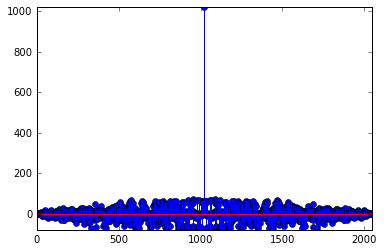

In [20]:
## PART A CODE HERE
def array_correlation(array1,array2):
    """ This function should return two array or a matrix with one row corresponding to 
    the offset and other to the correlation value
    """
    offset = list(range(len(array1)+len(array2)-1)) 
    correlate = np.correlate(array1, array2, mode="full")
    return(offset, correlate)

offset, y = array_correlation(Gold_code_satellite(10), Gold_code_satellite(10))
print(y)
x = np.arange(len(y))
plt.axis([-1, len(x), min(y)-1, max(y)+1]) 

plt.stem(x, y, "b-", "bo")
plt.show()

[-1. -2. -1. ..., -3. -2. -1.]


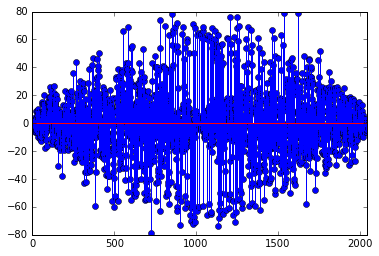

In [21]:
## PART B CODE HERE
offset, y = array_correlation(Gold_code_satellite(10), Gold_code_satellite(13))

print(y)

plt.axis([-1, len(x), min(y)-1, max(y)+1]) 
x = np.arange(len(y))
plt.stem(x, y, "b-", "bo")
plt.show()

[ 1.  2. -1. ...,  1.  2.  1.]


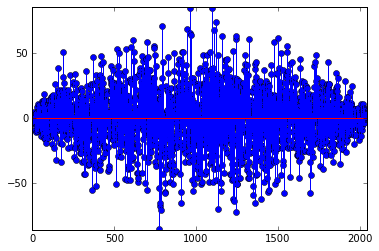

In [22]:
## PART C CODE HERE
## THIS IS A HELPER FUNCTION FOR PART C
def integernoise_generator(length_of_noise):
    noise_array = np.random.randint(2,size = length_of_noise)
    noise_array = 2*noise_array - np.ones(size(noise_array))
    return noise_array

offset, y = array_correlation(Gold_code_satellite(10), integernoise_generator(1023))

print(y)

plt.axis([-1, len(x), min(y) - 1, max(y) + 1]) 
x = np.arange(len(y))
plt.stem(x, y, "b-", "bo")
plt.show()            

[-0.61033866 -1.71346625 -0.36507099 ..., -1.77420373 -1.5092768
 -1.68821916]


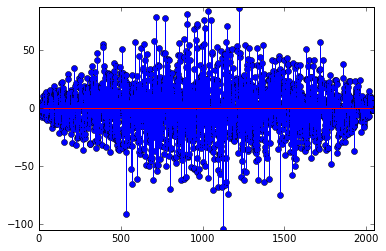

In [23]:
## PART D CODE HERE
## THIS IS A HELPER FUNCTION FOR PART D
def gaussiannoise_generator(length_of_noise):
    noise_array = np.random.normal(0,1,length_of_noise)
    return noise_array

offset, y = array_correlation(Gold_code_satellite(10), gaussiannoise_generator(1023))
print(y)

plt.axis([-1, len(x), min(y) - 1, max(y) + 1]) 
x_coor = np.arange(len(y))
plt.stem(x, y, "b-", "bo")
plt.show()

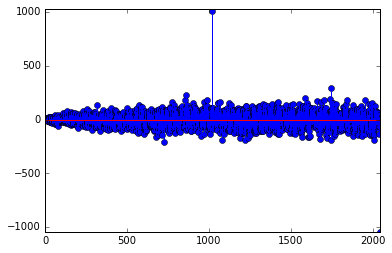

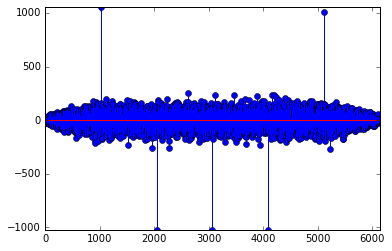

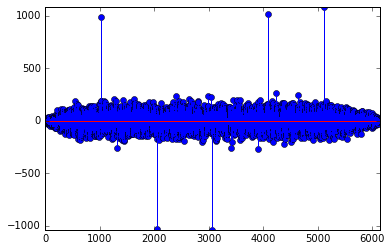

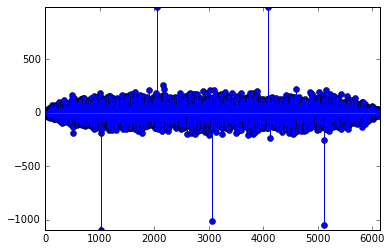

[4, 7, 13, 19]


In [24]:
## PART E CODE HERE
## USE 'LOAD' FUNCTION TO LOAD THE DATA
## USE DATA1.NPY AS THE SIGNAL ARRAY

satellites = []
signal = np.load("data1.npy")
for i in range(1, 25):
    offset, y = array_correlation(signal, Gold_code_satellite(i))
    if min(y) < -500 or max(y) > 500:
        satellites.append(i)
        plt.axis([-1, len(x), min(y) - 1, max(y) + 1]) 
        x = np.arange(len(y))
        plt.stem(x, y, "b-", "bo")
        plt.show()
        
print(satellites)

[ 0.1823331  -0.14363724 -0.93911872 ..., -0.26802293  1.41068829
 -1.46613957]


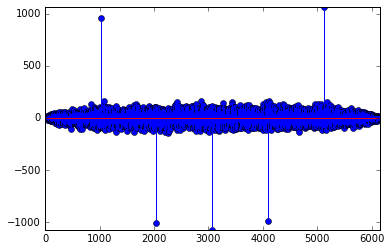

Satellite: 3


In [25]:
## PART F CODE HERE

satellites, signal = [], np.load("data2.npy")
print(signal)
for i in range(1, 25):
    offset, y = array_correlation(signal, Gold_code_satellite(i))
    if min(y) < -500 or max(y) > 500:
        satellites.append(i)
        plt.axis([0, len(x) + 10, min(y) - 1, max(y) + 1]) 
        x = np.arange(len(y))
        plt.stem(x, y, "b-", "bo")
        plt.show()
print("Satellite:", satellites[0])

[-1.97847561  0.32305173  0.5788338  ..., -0.19858476 -1.50222466
 -0.68688047]


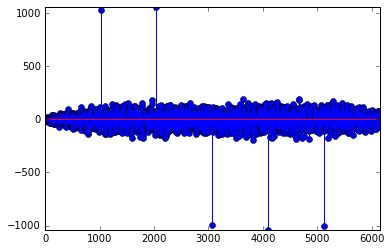

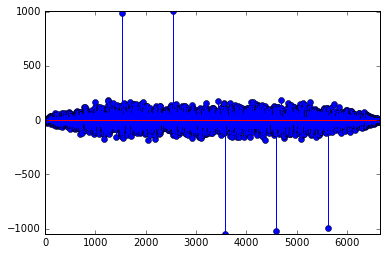

Satellites: [5, 20]
Delays: [1022, 2045, 3068, 4091, 5114, 1528, 2551, 3574, 4597, 5620]


In [26]:
## PART G CODE HERE
## USE DATA3.NPY AS THE SIGNAL ARRAY

satellites, signal = [], np.load("data3.npy")
print(signal)
for i in range(1, 25):
    offset, y = array_correlation(signal, Gold_code_satellite(i))
    if min(y) < -500 or max(y) > 500:
        satellites.append(i)
        plt.axis([0, len(x)+10, min(y)-1, max(y)+1]) 
        x = np.arange(len(y))
        plt.stem(x, y, "b-", "bo")
        plt.show()
print("Satellites:", satellites)


delays = []
for sat in satellites:
    rel_delay, y = array_correlation(signal, Gold_code_satellite(sat))
    for i in range(len(y)):
        if y[i] > 500 or y[i] < -500:
            delays.append(rel_delay[i])
print("Delays:", delays)